# Welcome to our Compare Flights notebook!

In [63]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
%matplotlib inline

# Importing the CompareFlights class

In [65]:
from rocketpy.plots.compare import CompareFlights


In [66]:
CompareFlights


rocketpy.plots.compare.compare_flights.CompareFlights

In [67]:
dir(CompareFlights)


['_CompareFlights__compare_trajectories_3d',
 '_CompareFlights__create_comparison_figure',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'accelerations',
 'aerodynamic_forces',
 'aerodynamic_moments',
 'all',
 'angles_of_attack',
 'angular_accelerations',
 'angular_velocities',
 'attitude_angles',
 'attitude_frequency',
 'energies',
 'euler_angles',
 'fluid_mechanics',
 'positions',
 'powers',
 'quaternions',
 'rail_buttons_forces',
 'report',
 'stability_margin',
 'stream_velocities',
 'trajectories_2d',
 'trajectories_3d',
 'velocities']

# Creating the Flight objects

In [98]:
from rocketpy import Environment, Flight, Rocket, SolidMotor
from datetime import datetime, timedelta

In [105]:
aft_tomorrow = datetime.now() + timedelta(days=2)
env = Environment(railLength=5, latitude=-23, longitude=-49, date=aft_tomorrow)
env.setAtmosphericModel(type="Forecast", file="GFS")

motor = SolidMotor(
    thrustSource=2000,
    burnOut=5,
    grainNumber=1,
    grainSeparation=0.01,
    grainOuterRadius=100 / 1000,
    grainInitialInnerRadius=50 / 1000,
    grainInitialHeight=200 / 1000,
    grainDensity=1800,
)

rocket = Rocket(
    motor=motor,
    radius=0.1,
    mass=1,
    inertiaI=0.0001,
    inertiaZ=0.0001,
    distanceRocketNozzle=0,
    distanceRocketPropellant=0,
    powerOffDrag=0.5,
    powerOnDrag=0.5,
)

rocket.setRailButtons(distanceToCM=[-0.15, 0.2], angularPosition=45)

inclinations = [85, 80, 70]
headings = [70, 135]
flights = []

for heading in headings:
    for inclination in inclinations:
        flight = Flight(
            environment=env,
            rocket=rocket,
            inclination=inclination,
            heading=heading,
            name=f"Incl {inclination} Head {heading}",
        )
        flights.append(flight)


In [106]:
print("Number of flights: ", len(flights))


Number of flights:  6


# Start the comparison

In [107]:
comparison = CompareFlights(flights)


## Linear Kinematics

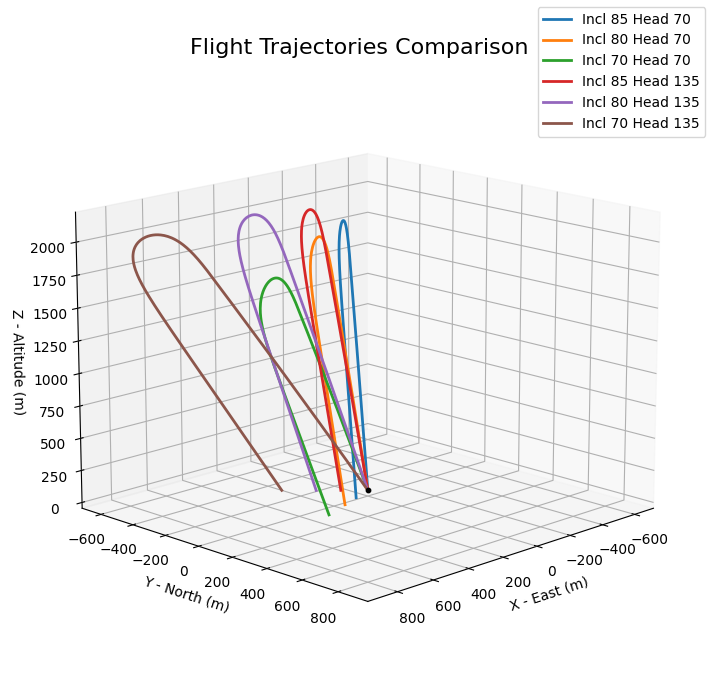

In [108]:
comparison.trajectories_3d(legend=True)


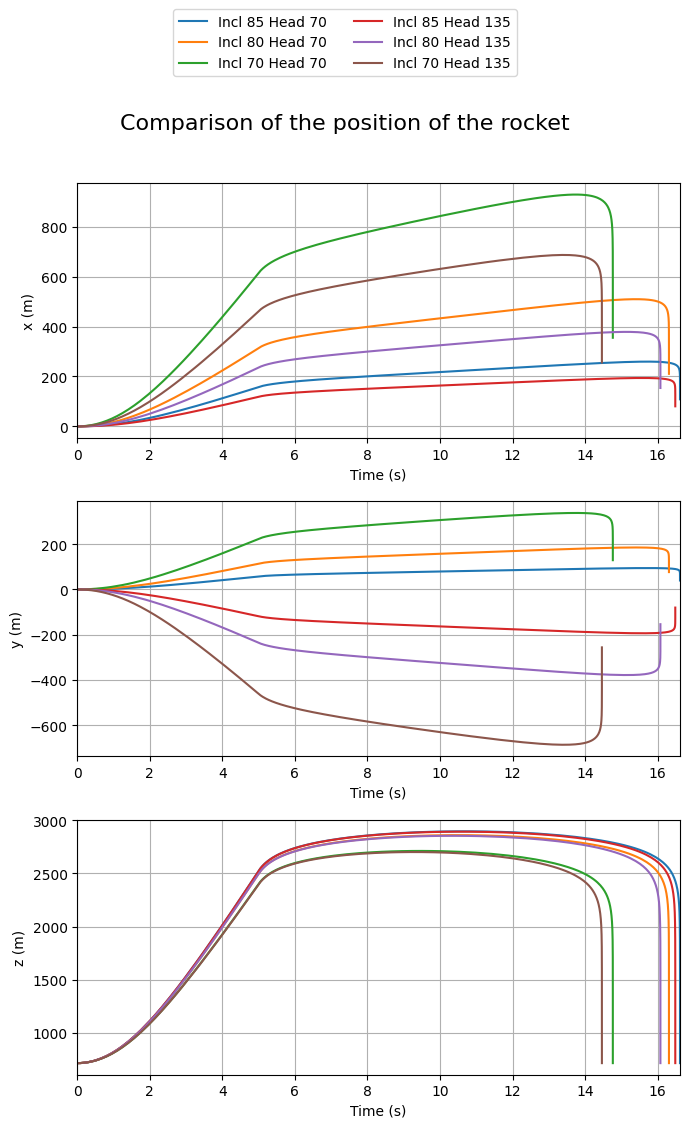

In [109]:
comparison.positions()


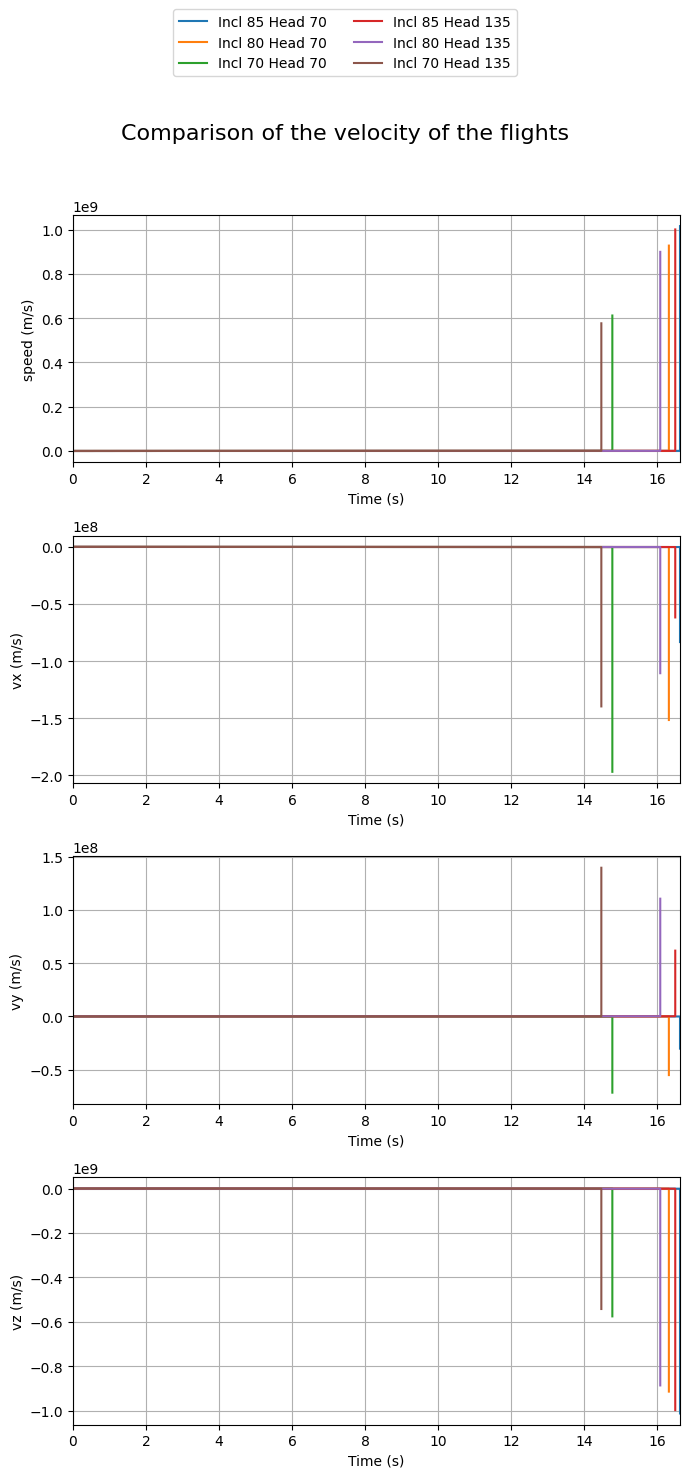

In [110]:
comparison.velocities()


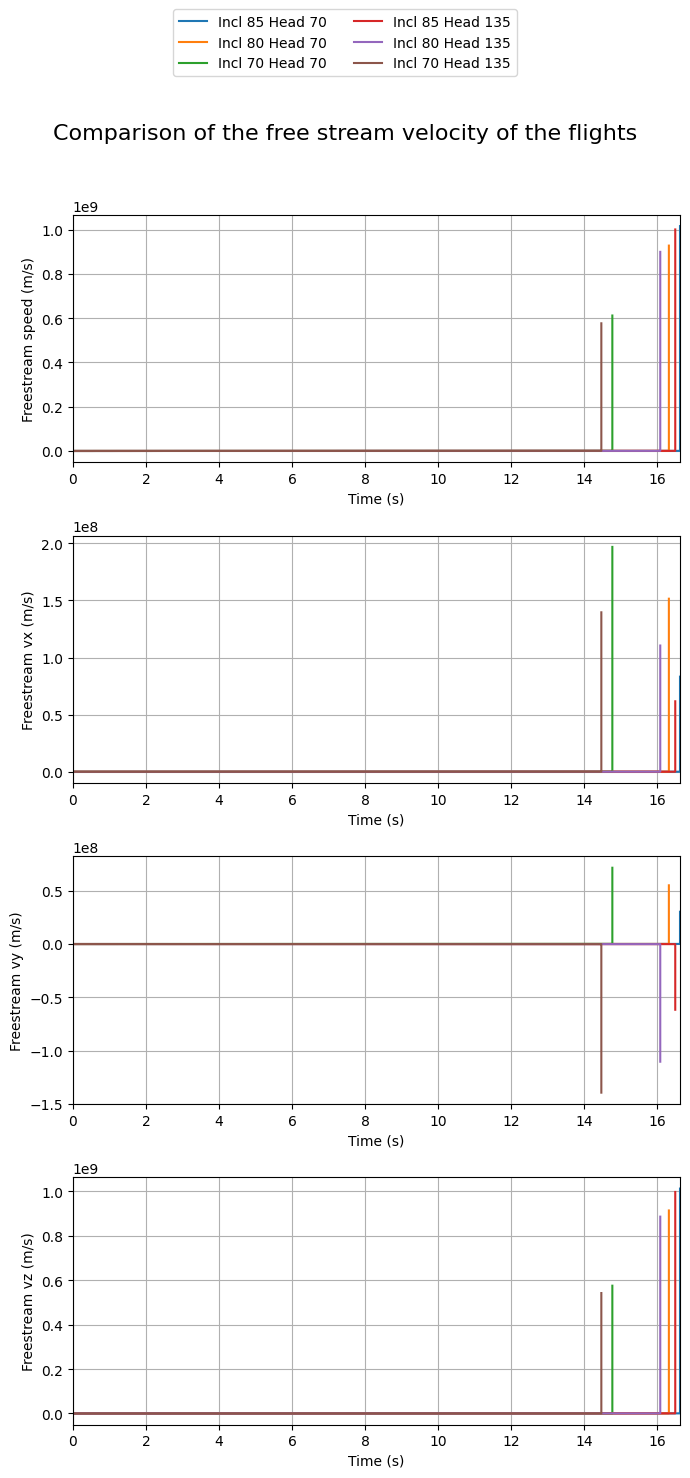

In [111]:
comparison.stream_velocities()


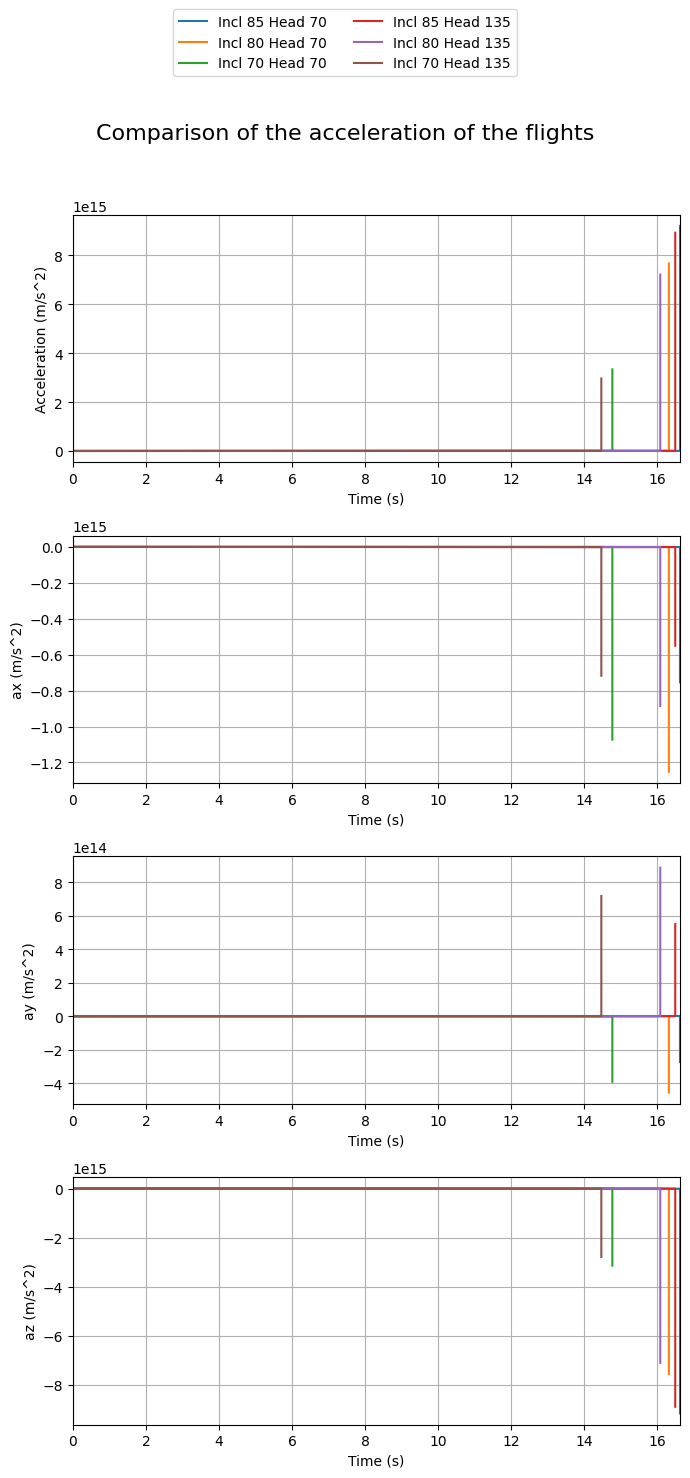

In [112]:
comparison.accelerations()


## Angular kinematics

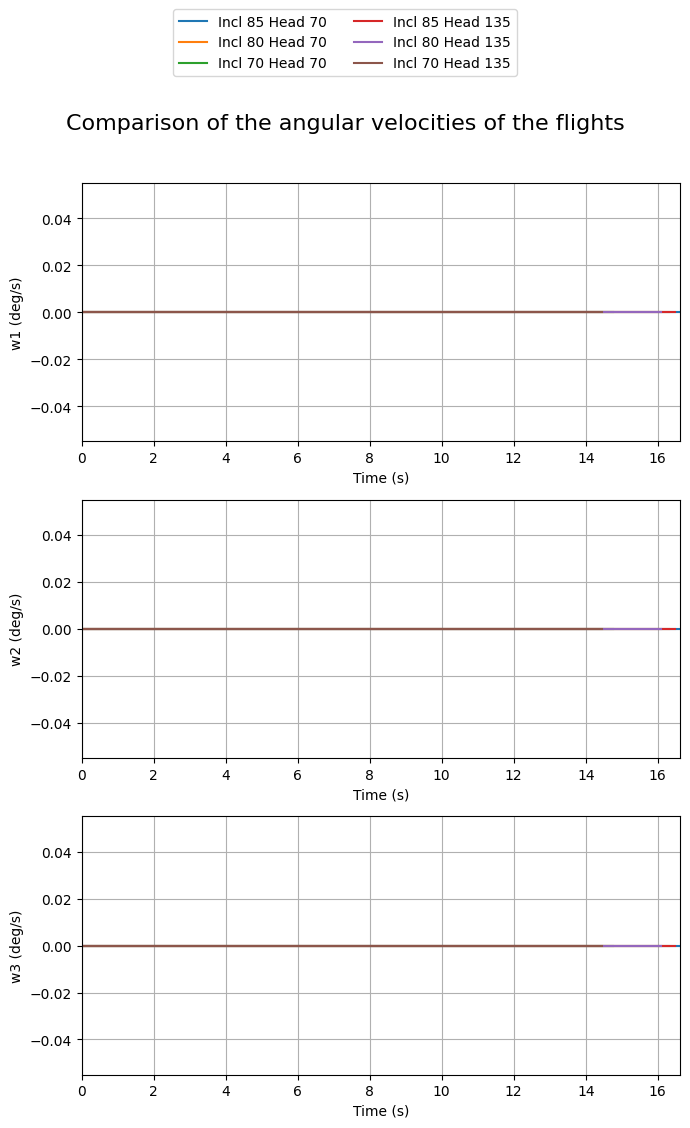

In [113]:
comparison.angular_velocities()


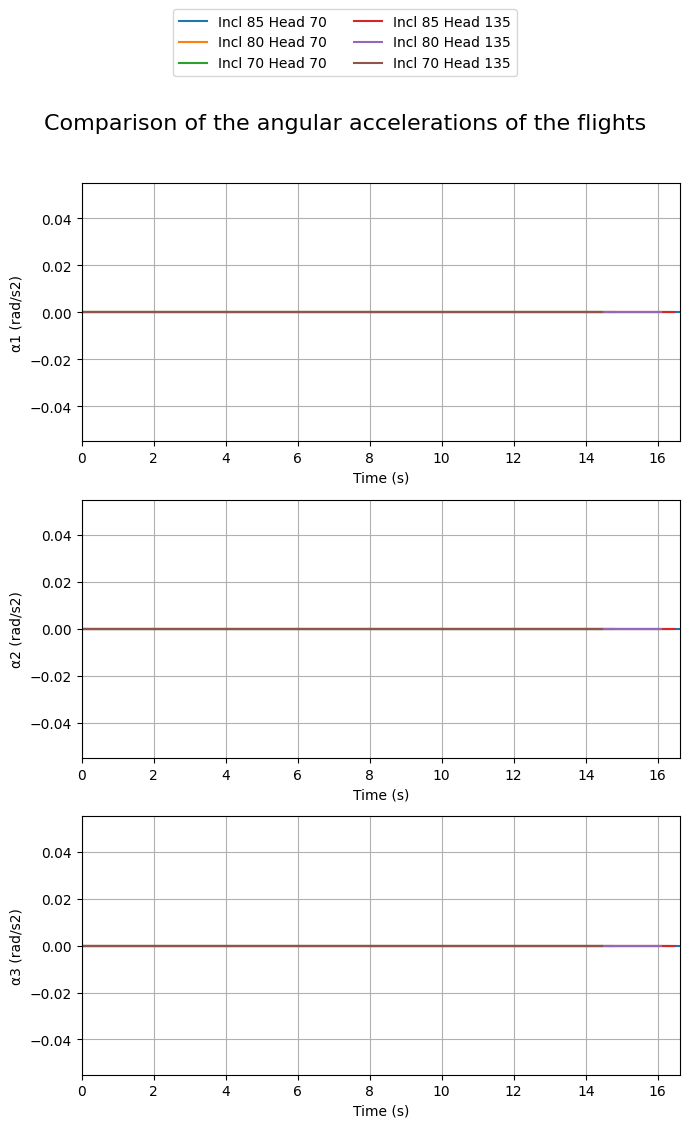

In [114]:
comparison.angular_accelerations()


## Attitudes

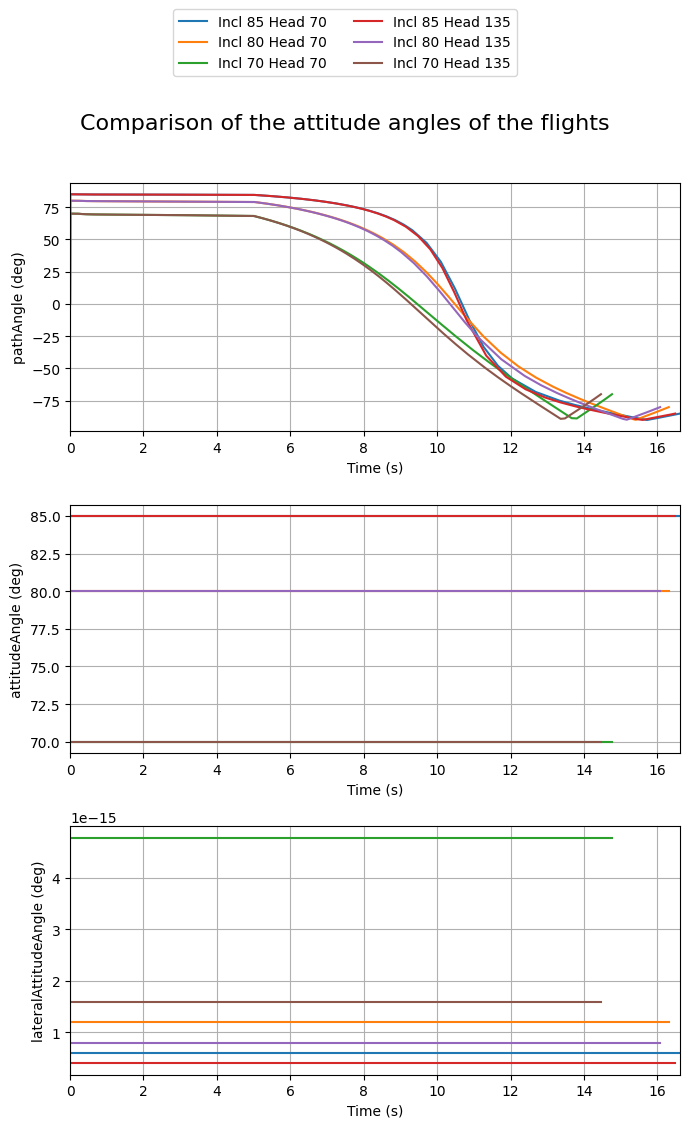

In [115]:
comparison.attitude_angles()


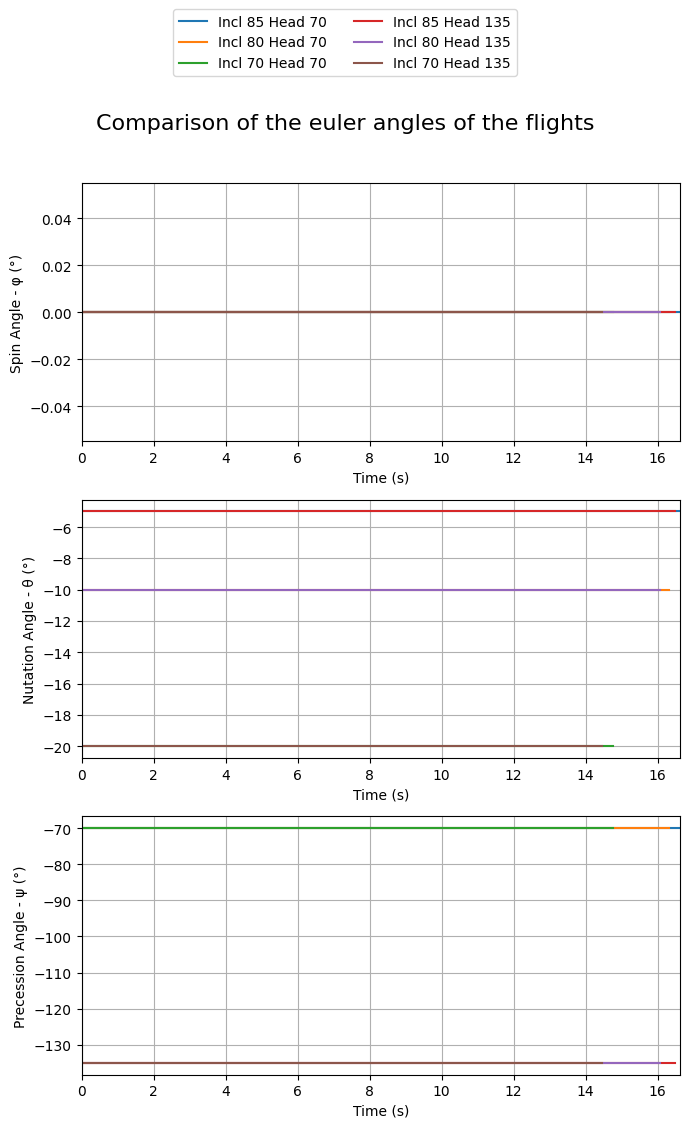

In [116]:
comparison.euler_angles()


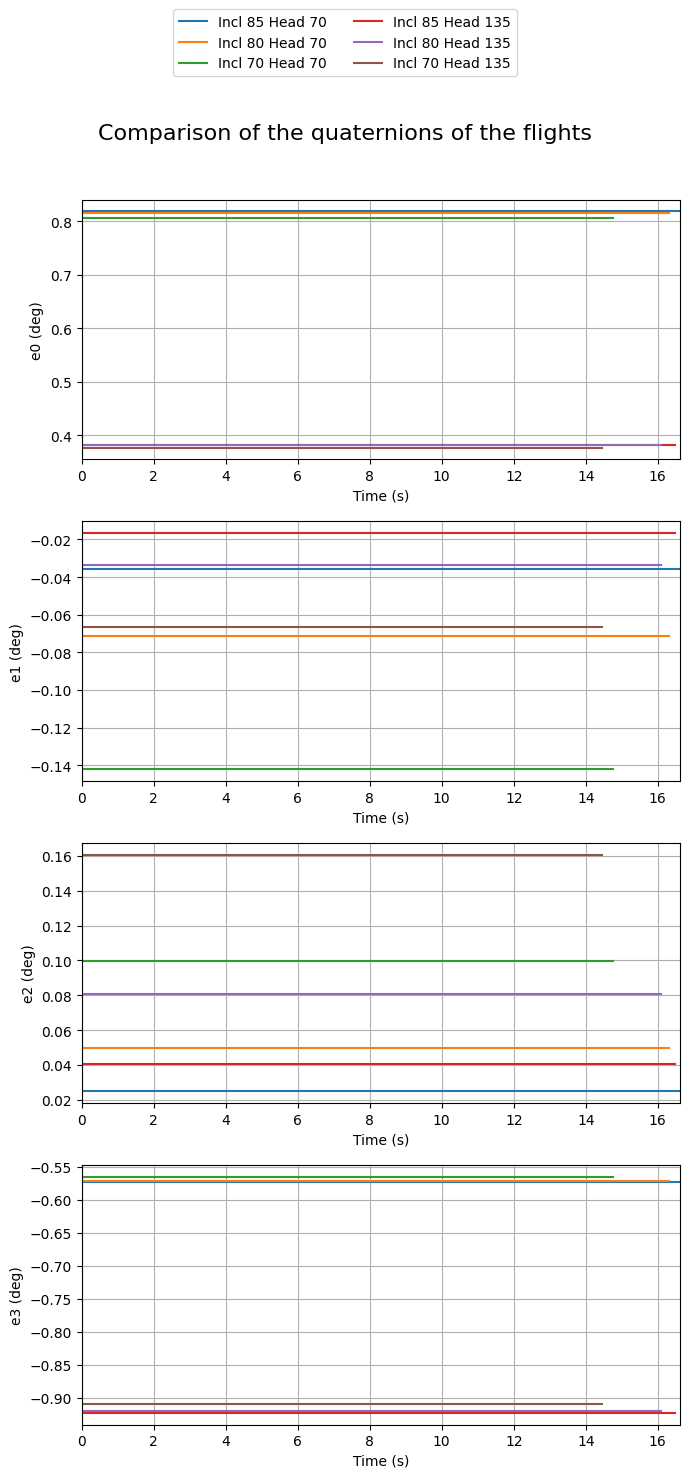

In [117]:
comparison.quaternions()


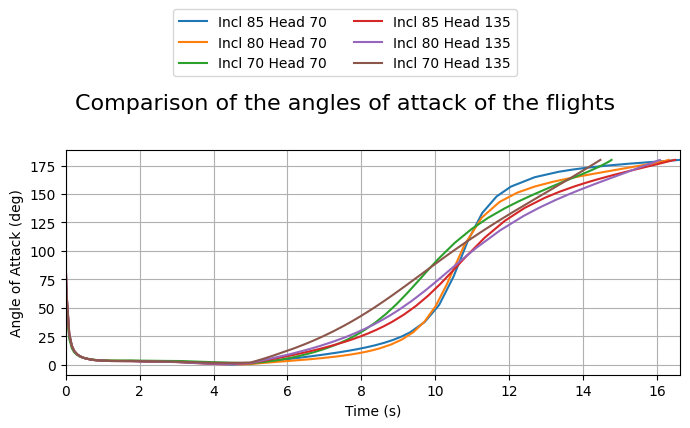

In [118]:
comparison.angles_of_attack()


## Forces and Moments

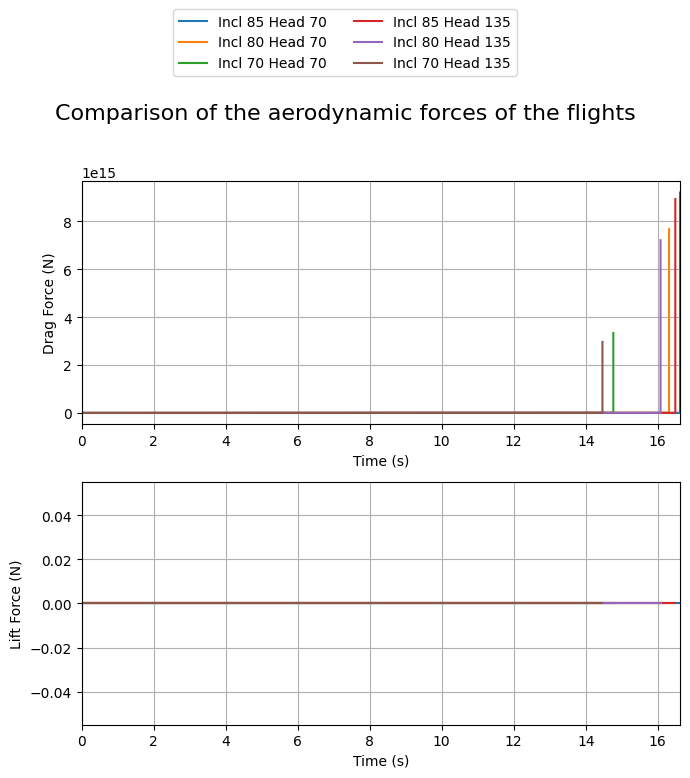

In [119]:
comparison.aerodynamic_forces()


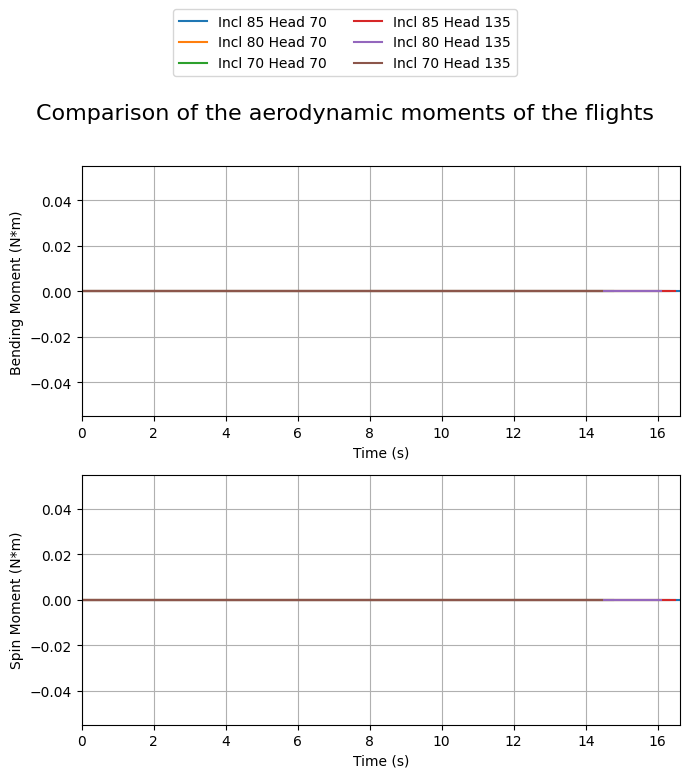

In [120]:
comparison.aerodynamic_moments()


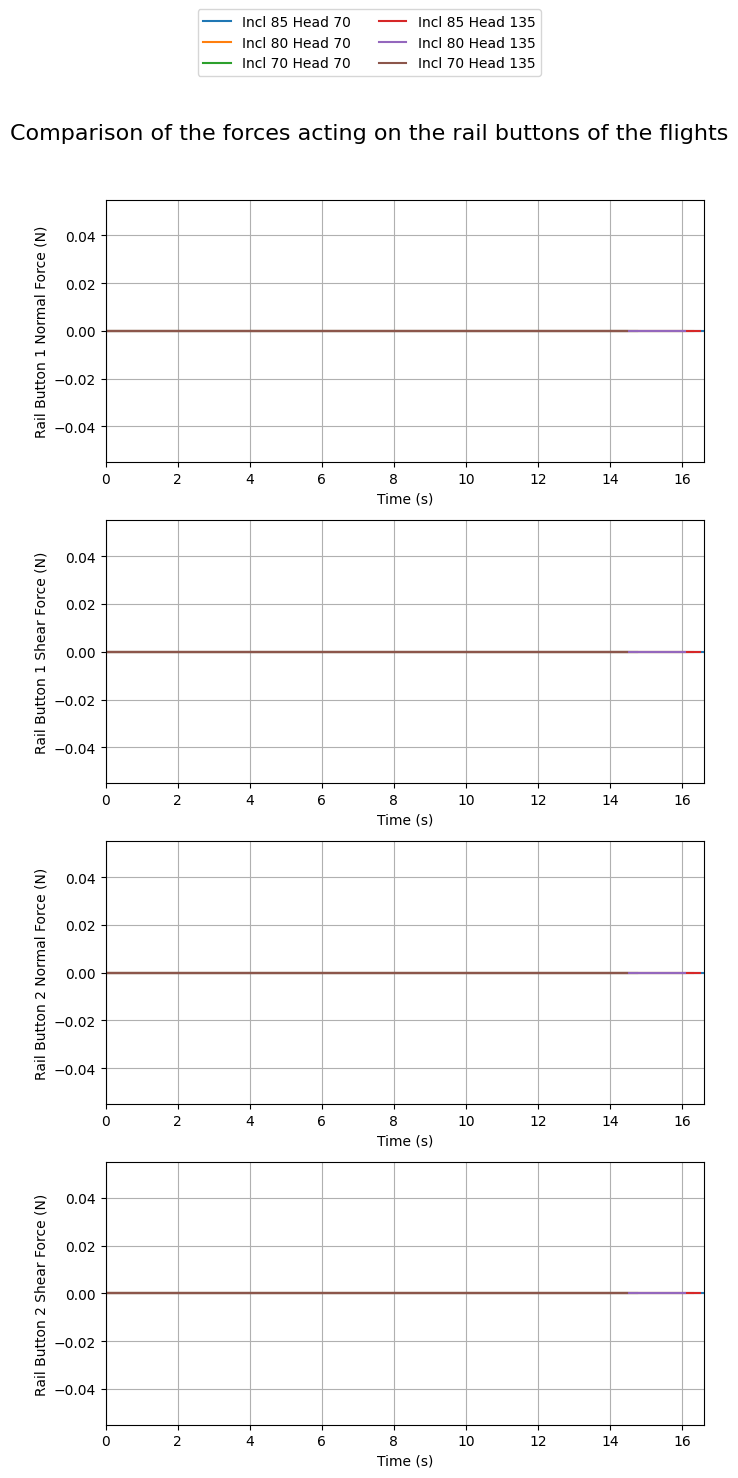

In [121]:
comparison.rail_buttons_forces()


## Energies and Power

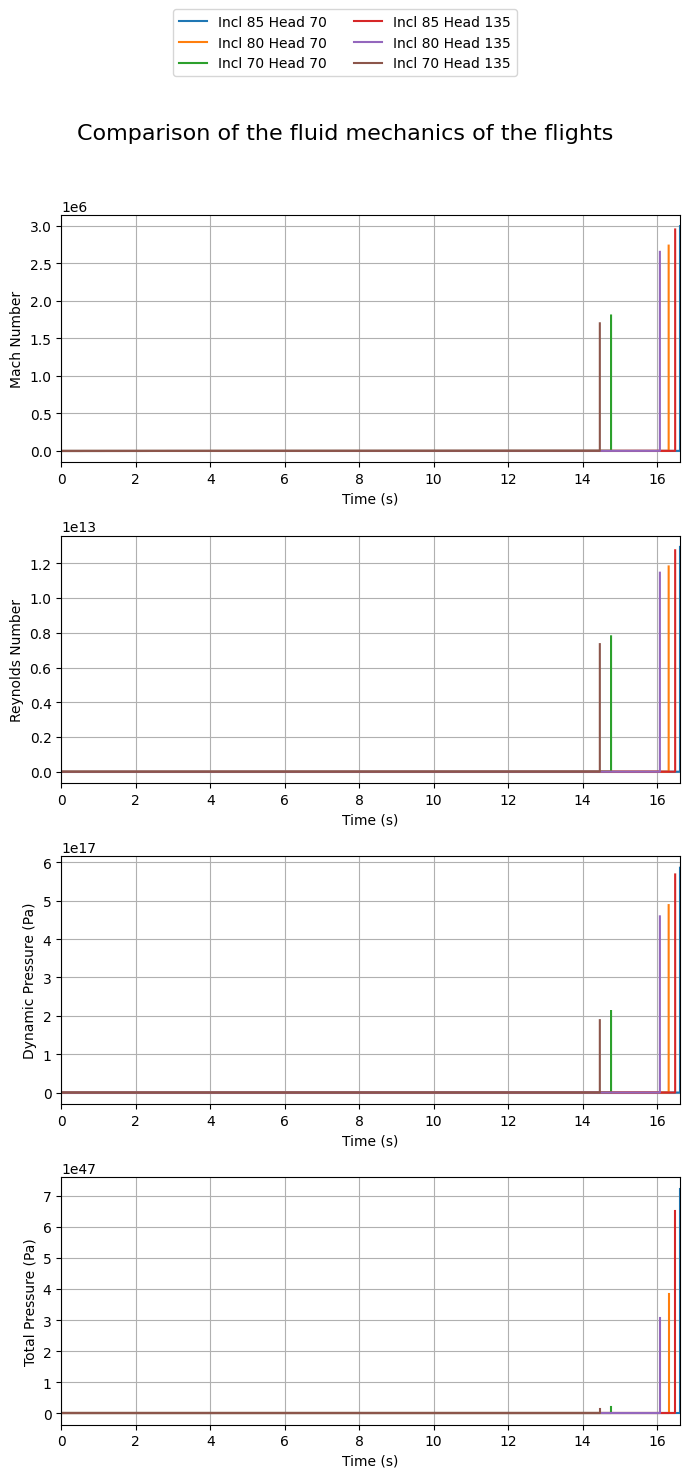

In [122]:
comparison.fluid_mechanics()


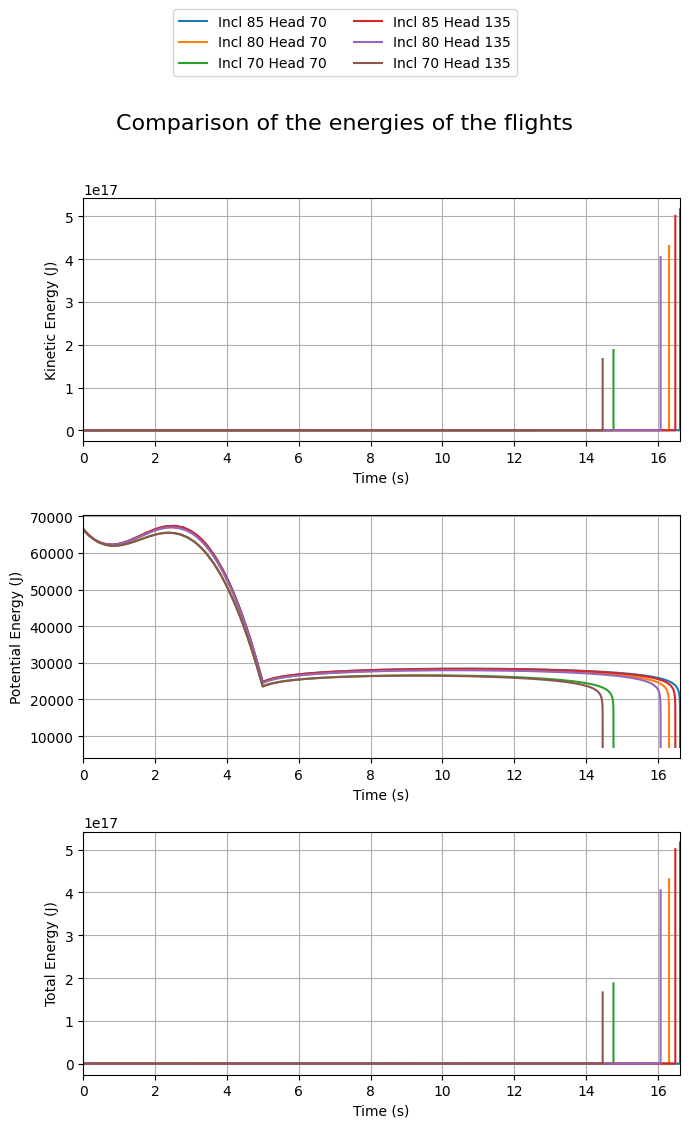

In [123]:
comparison.energies()


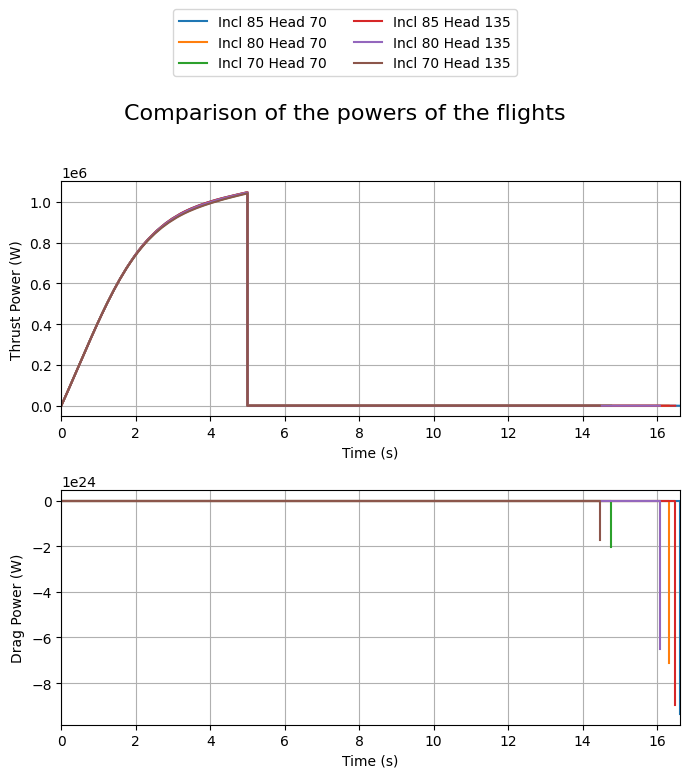

In [126]:
comparison.powers()


## Plotting everything together

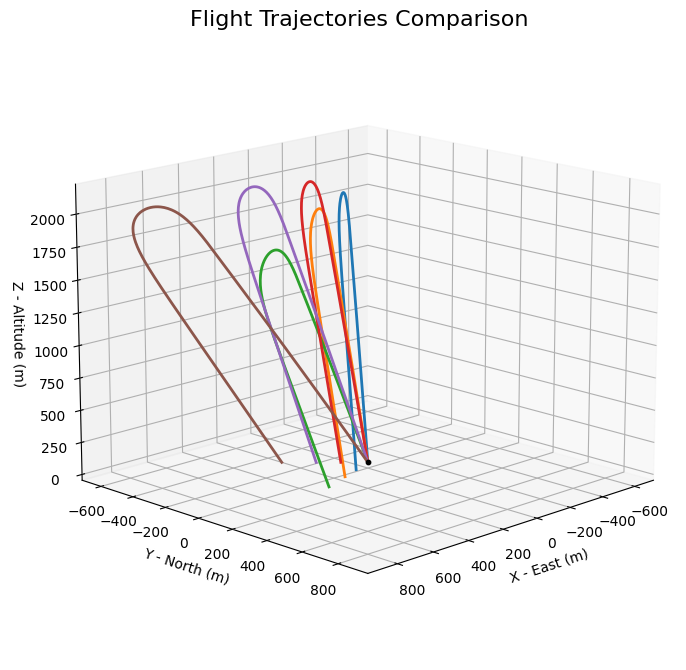

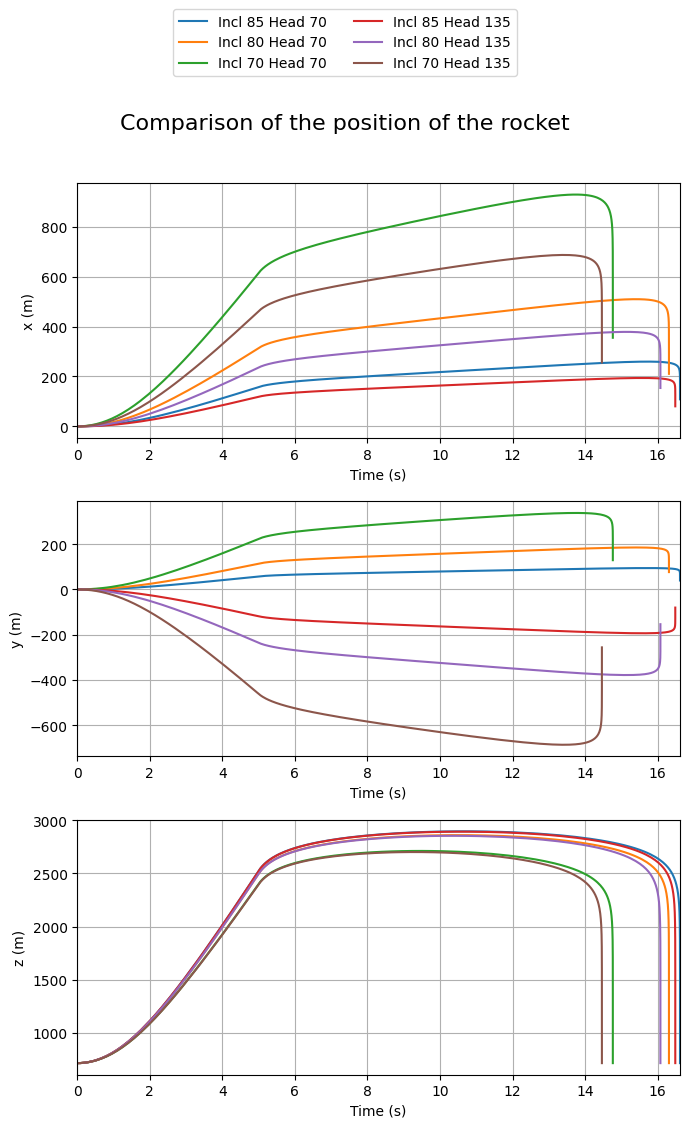

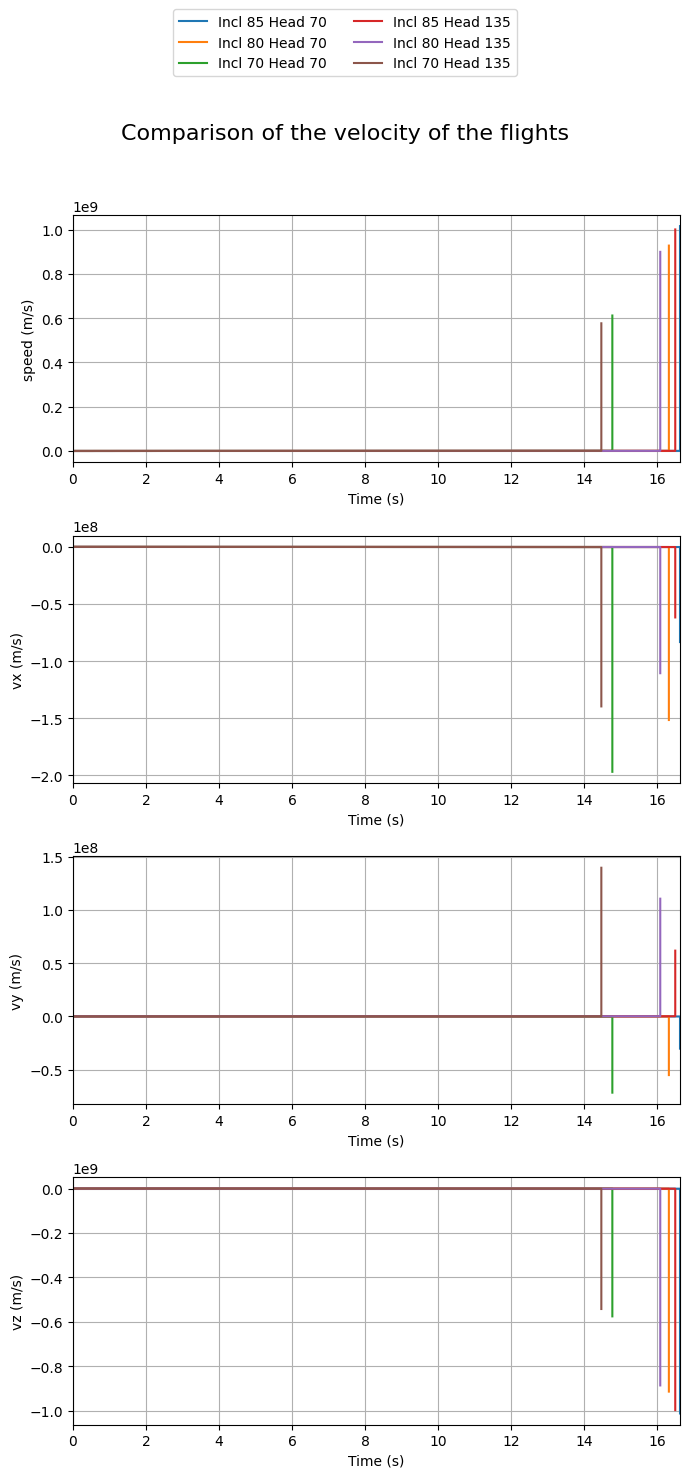

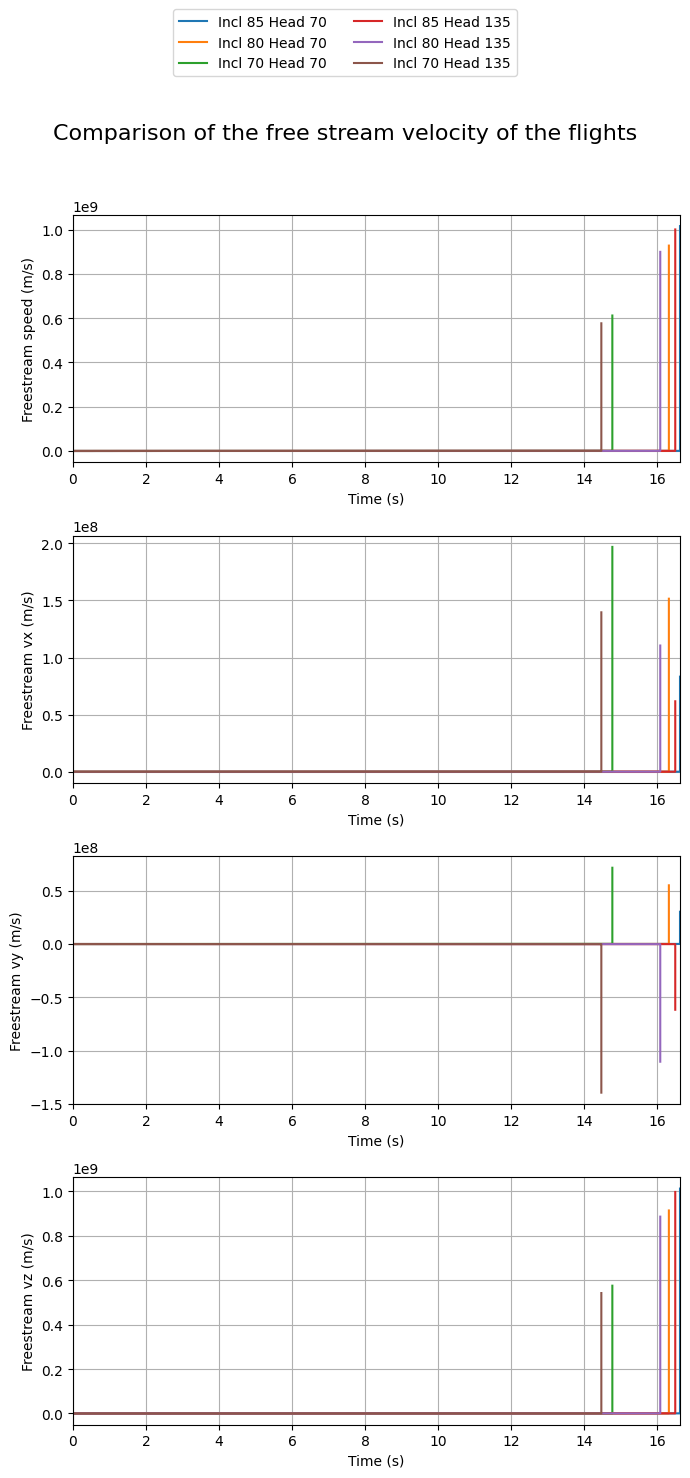

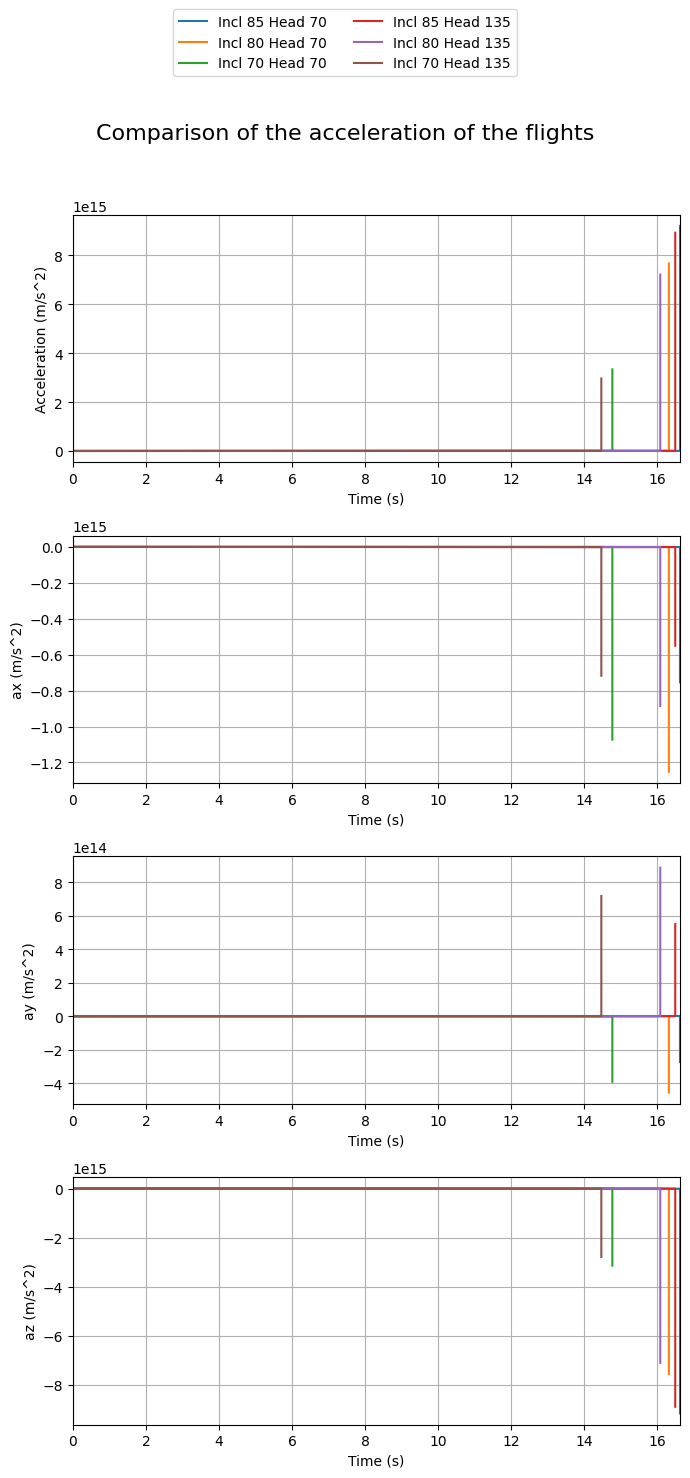

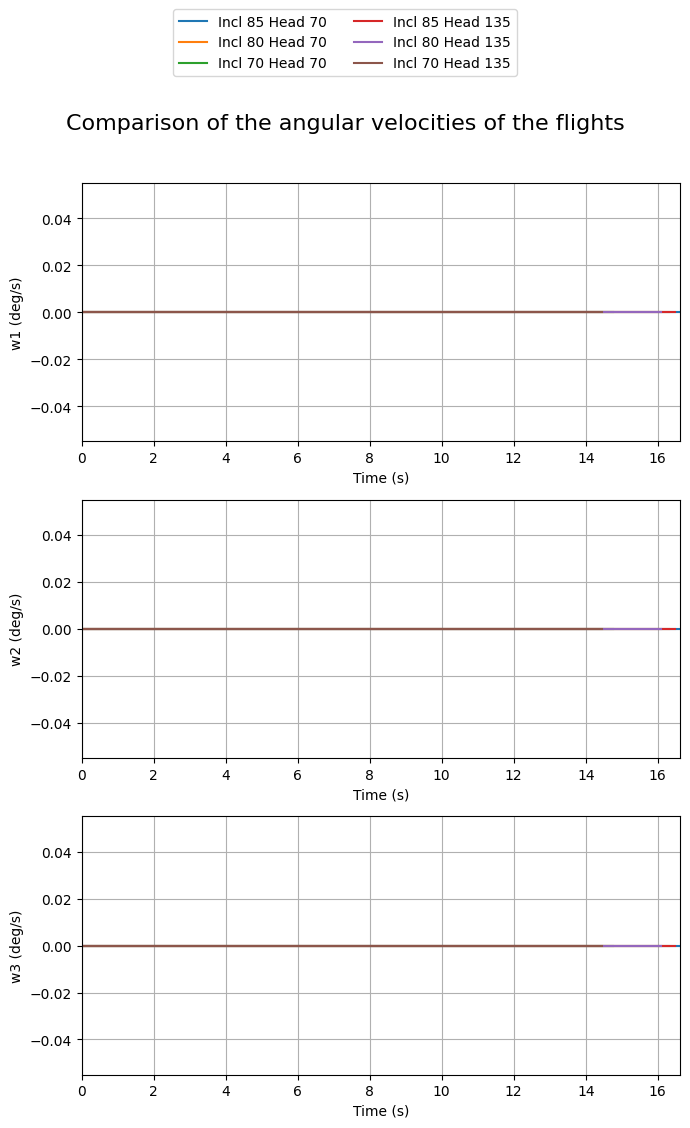

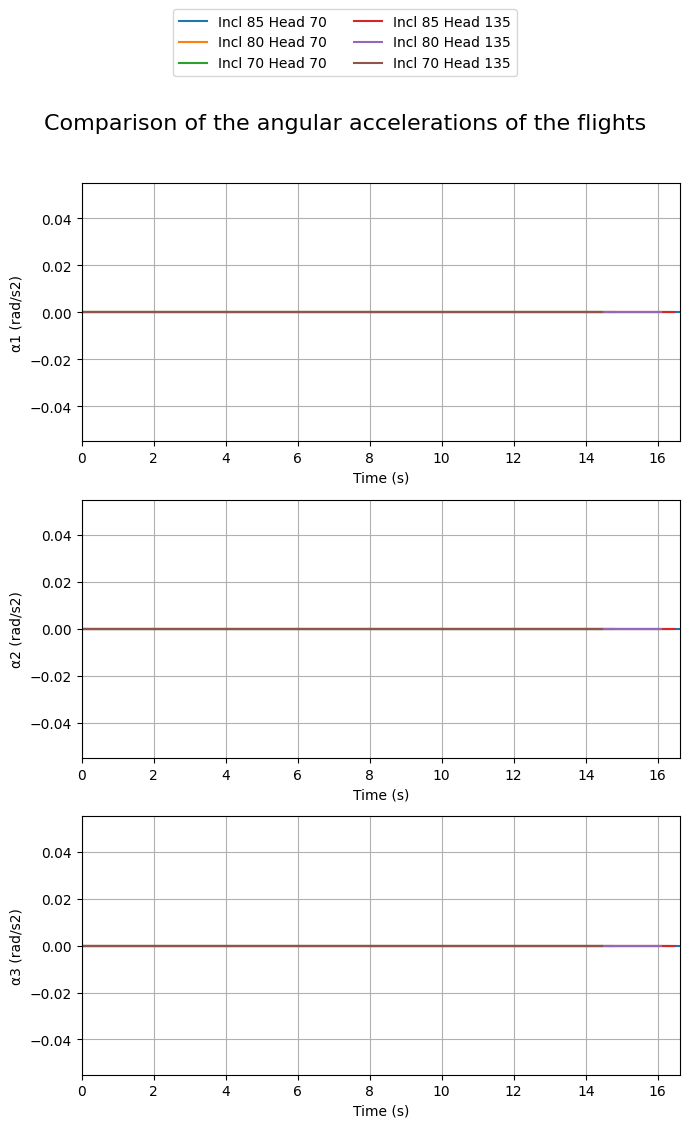

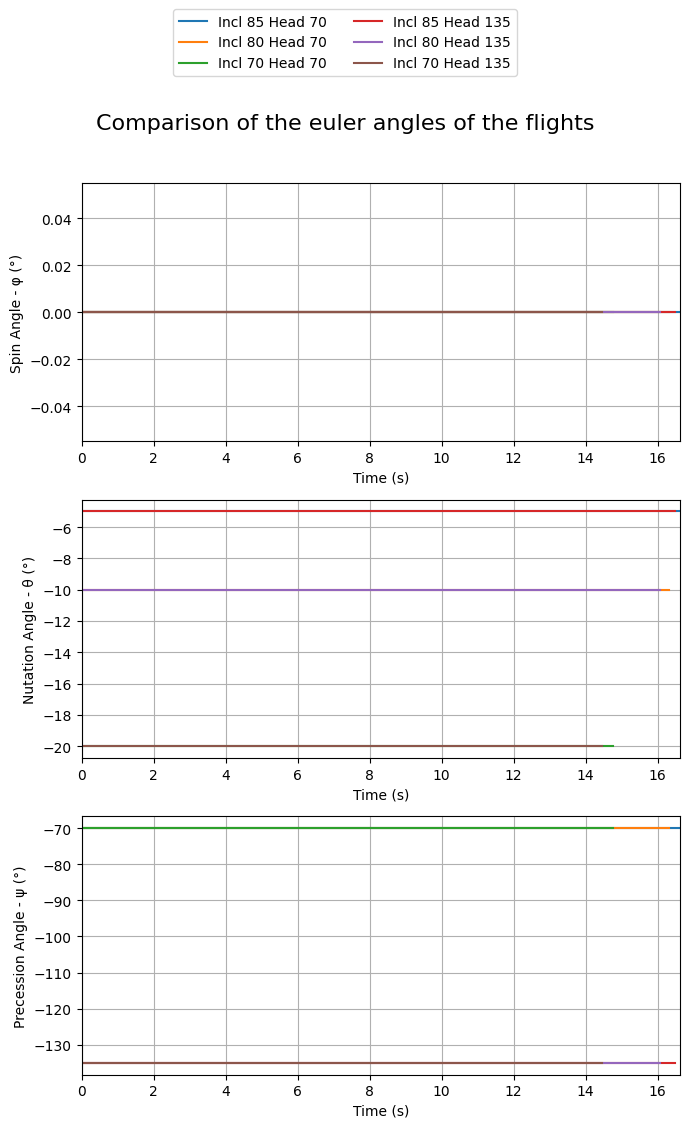

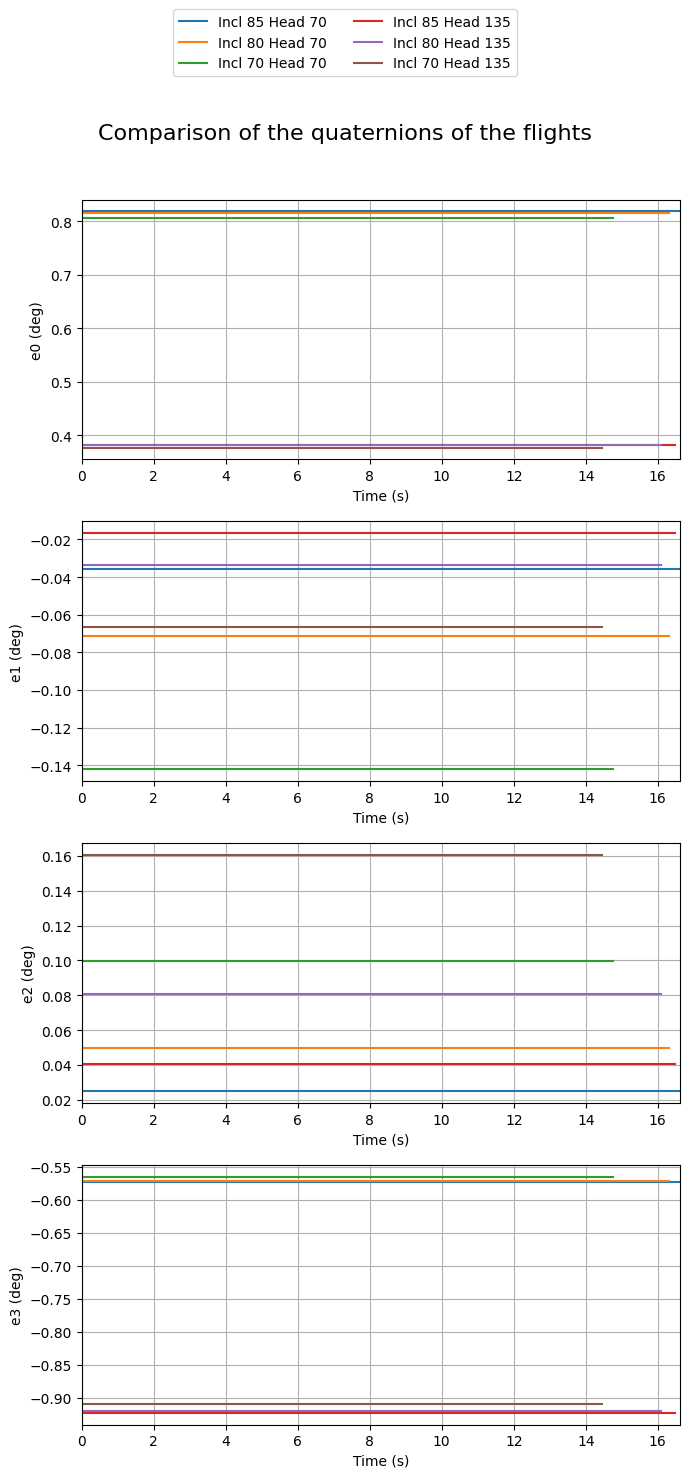

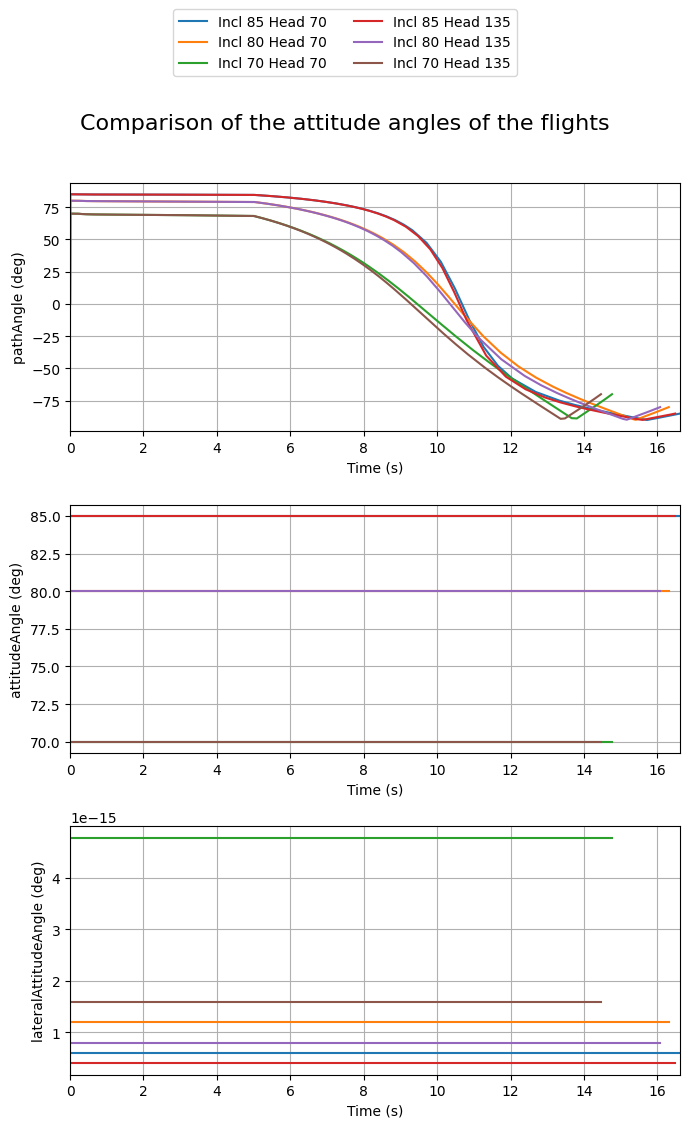

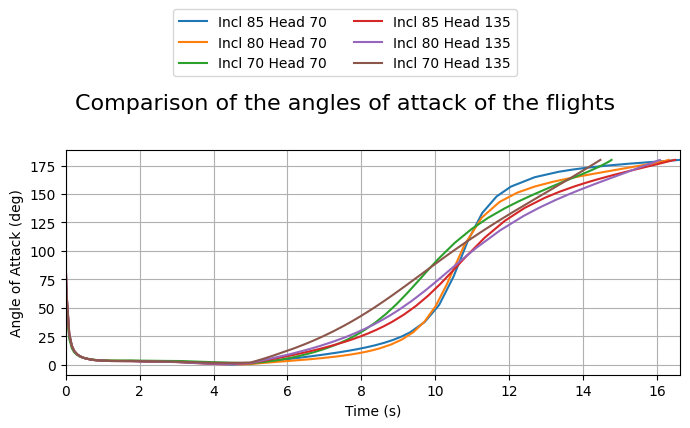

This method is not implemented yet


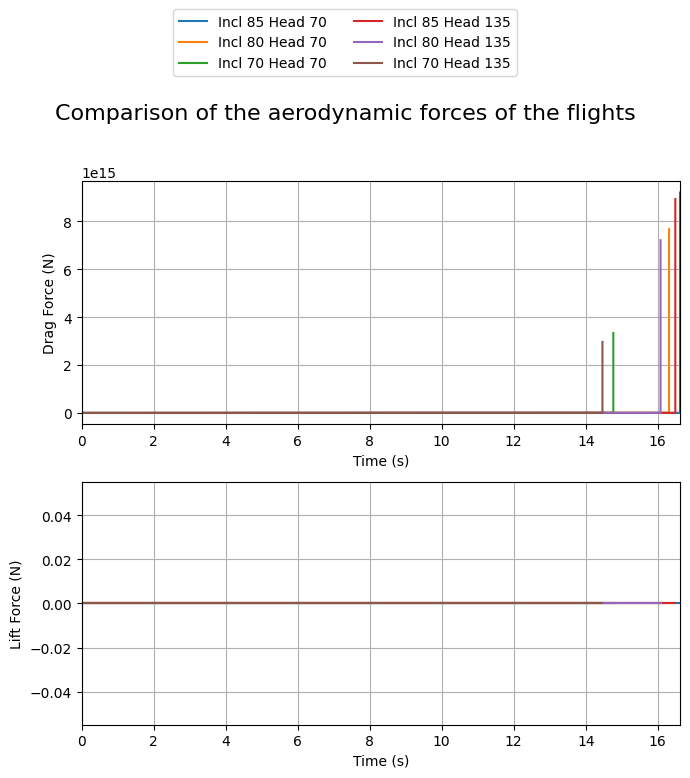

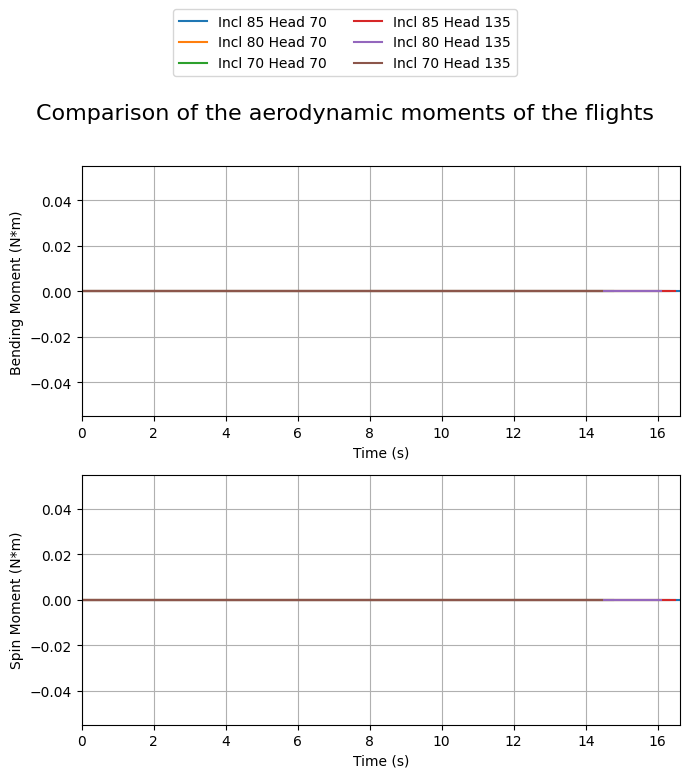

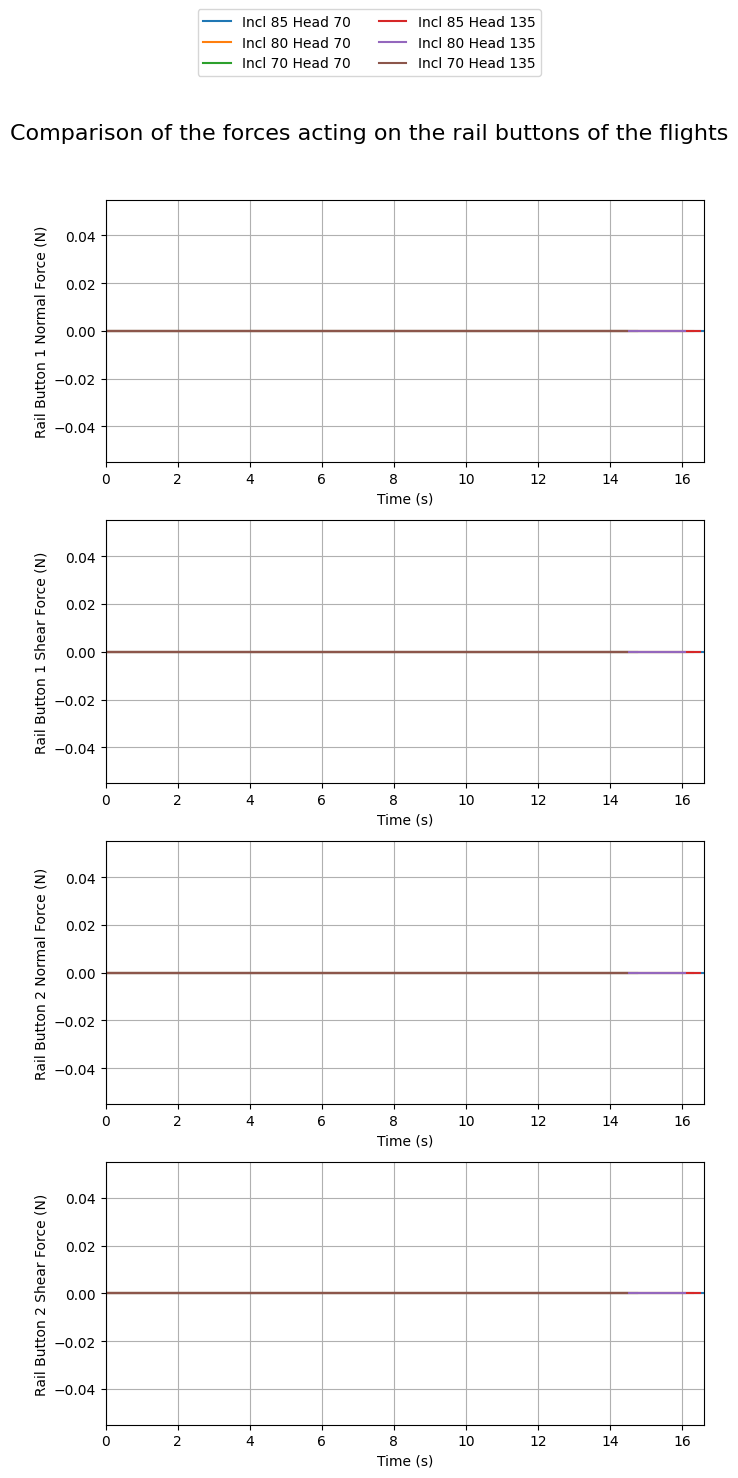

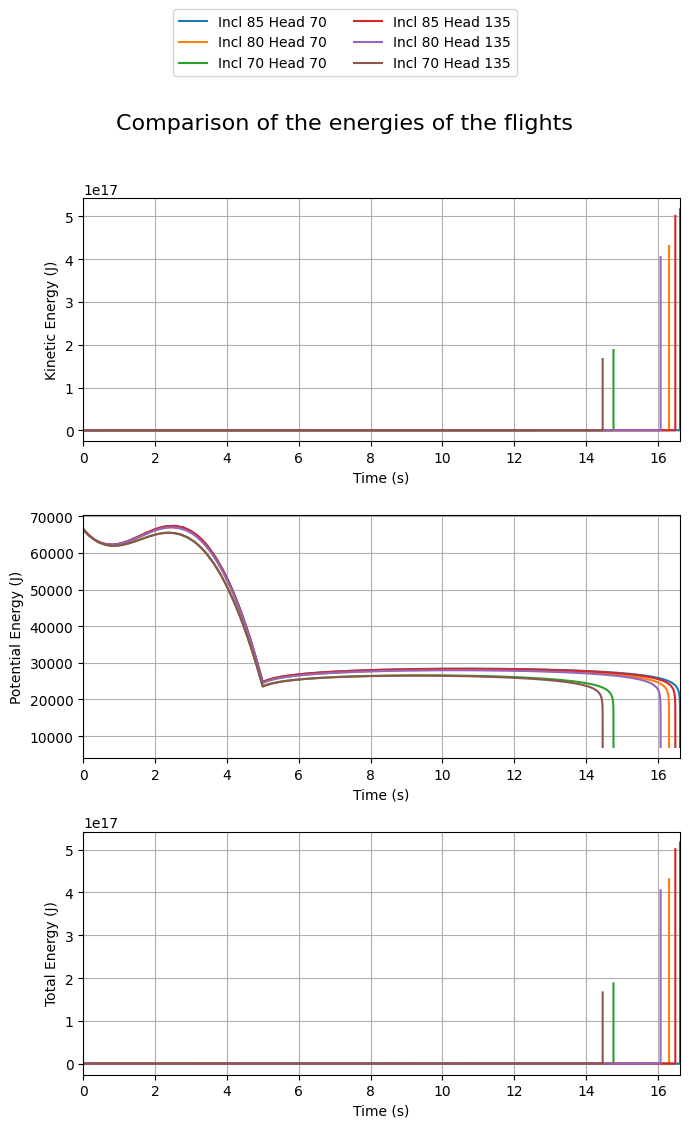

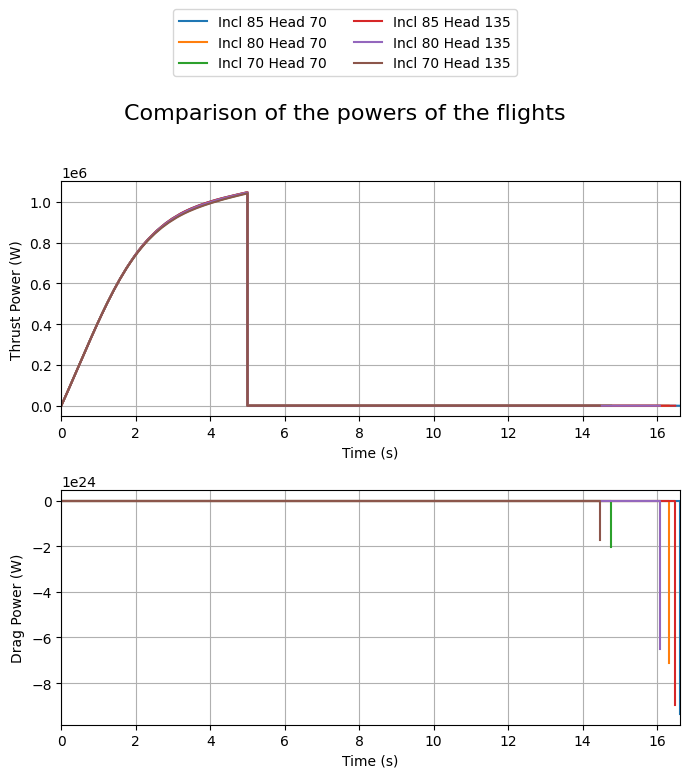

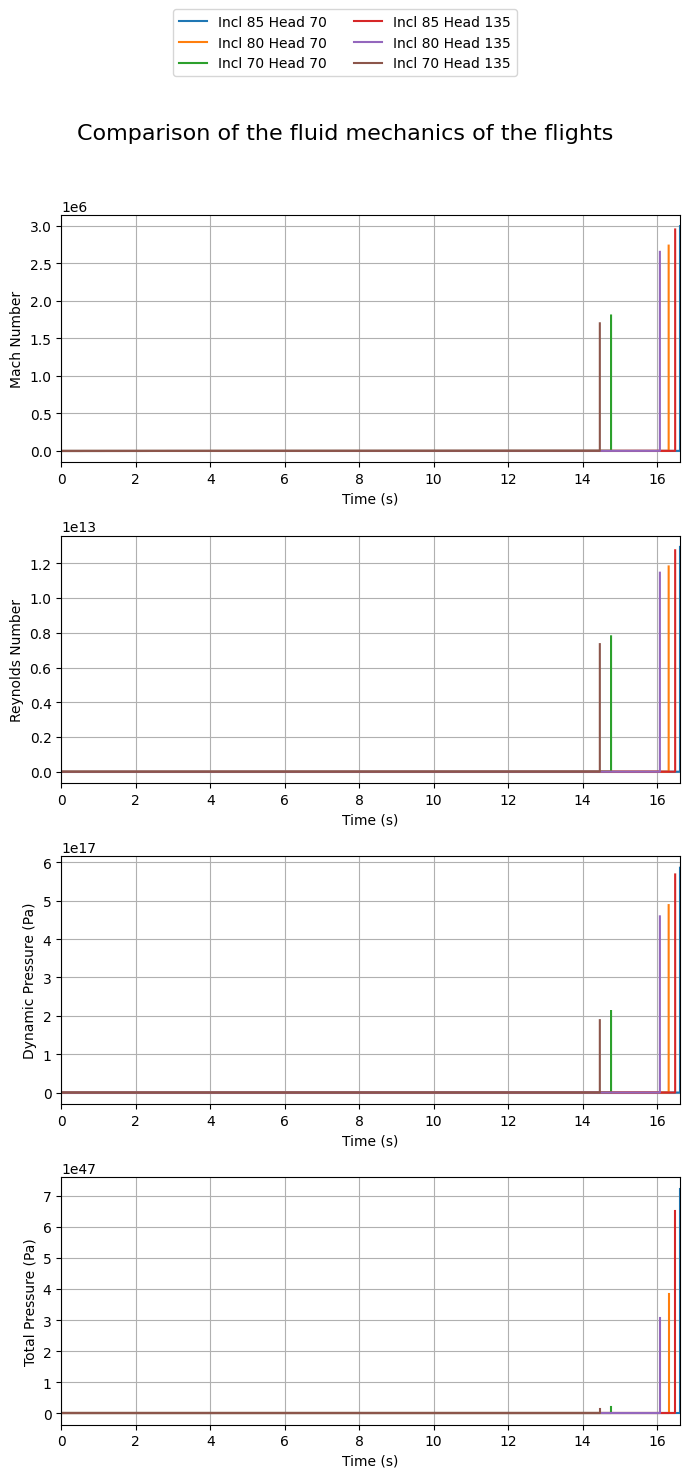

This method is not implemented yet


In [125]:
comparison.all()
